In [123]:
# Load needed python resources
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)
import pandas as pd
data = 'https://archive.ics.uci.edu/ml/datasets/wine+quality'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
df = pd.read_csv('winequality-red.csv', delimiter=';')

In [126]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This dataset comes from a machine learning repository provided by UC Irvine. There are 1599 entries in the dataset with 11 quantitative variables that have measurements about different wines. There is also 1 categorical variable which is a quality rating on an integer scale from 0 to 10. The measurements provided on the wine can be seen above. I am interested in this particular dataset because I have always been interested on what actually makes a good wine.

I would like to see whether there is a relationship between a combination of the wine characteristics and the quality of the wine. 

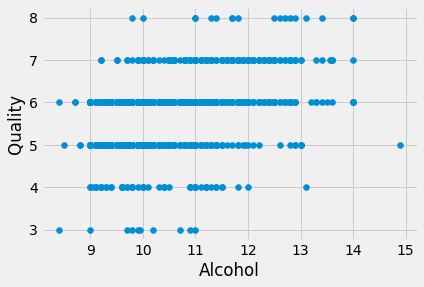

In [128]:
ax = plots.figure().add_subplot(111)
ax.set_xlabel('Alcohol')
ax.set_ylabel('Quality')
ax.scatter(df['alcohol'], df['quality'])

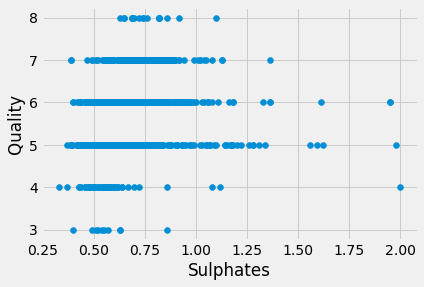

In [129]:
ax = plots.figure().add_subplot(111)
ax.set_xlabel('Sulphates')
ax.set_ylabel('Quality')
ax.scatter(df['sulphates'], df['quality'])

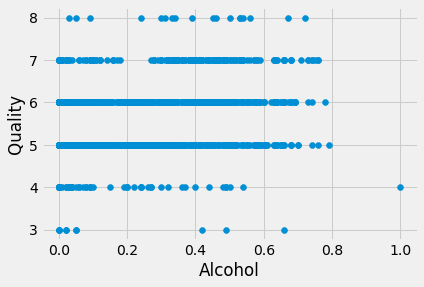

In [130]:
ax = plots.figure().add_subplot(111)
ax.set_xlabel('Alcohol')
ax.set_ylabel('Quality')
ax.scatter(df['citric acid'], df['quality'])

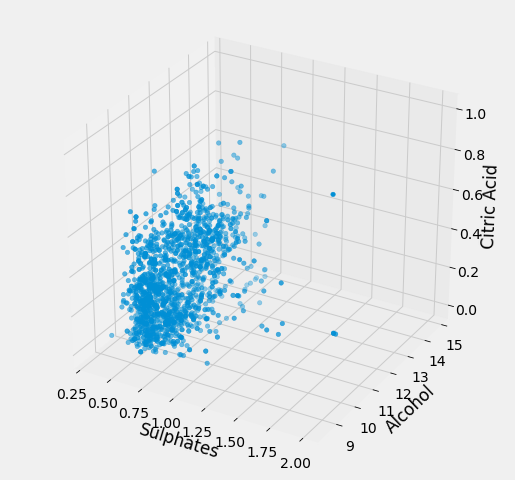

In [131]:
ax = plots.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.set_xlabel('Sulphates')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Citric Acid')
ax.scatter(df['sulphates'],
           df['alcohol'],
           df['citric acid']);

In [132]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum value is shown above for each column.

For the confidence interval portion of this project, I will find the mean difference in alcohol percentage between the higher quality wines and the lower quality wines. The higher quality wines will be defined as the wines with ratings of 6, 7, and 8. The lower quality wines will be defined as the wines with ratings of 3, 4 and 5.

In [133]:
higher = df[df['quality'] >= 6]
lower = df[df['quality'] <= 5]

In [134]:
def one_bootstrap_mean_difference():
    resampled_higher = higher.sample()
    resampled_lower = lower.sample()
    higher_mean = np.mean(resampled_higher['alcohol'])
    lower_mean = np.mean(resampled_lower['alcohol'])
    bootstrapped_mean_difference =  higher_mean - lower_mean
    return bootstrapped_mean_difference

In [135]:
num_repetitions = 5000
bstrap_means = np.array([])
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean_difference())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f737427cb50>]],
      dtype=object)

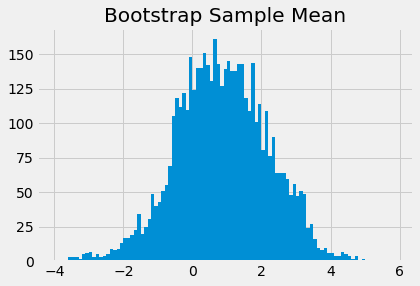

In [136]:
resampled_means = pd.DataFrame({'Bootstrap Sample Mean': bstrap_means})
mean_bins=np.arange(-4, 6, 0.1)
resampled_means.hist(bins = mean_bins)

In [137]:
np.percentile(bstrap_means, 2.5)

-1.8000000000000007

In [138]:
np.percentile(bstrap_means, 97.5)

3.4000000000000004

We are 95% confident that the true difference in alcohol percentage between high quality wines and low quality wines is between -1.7 and 3.5.

Given this, it is possible that higher quality wines tend to have more alcohol.

Next, I will implement a Naive Bayes Classifier to predict the quality of wine from the 3 parameters that have the highest correlation with quality.

In [139]:
corr = df.corr(method='pearson')
corr.nlargest(4, 'quality')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.185100,-0.174919,-0.057731,0.251397,0.476166,1.000000
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373


The method above shows the 3 columns with the largest correlation with quality. Alcohol, sulphates, and citric acid have the strongest correlation with quality.

In [140]:
qualityMeans = df.groupby('quality').mean()
qualitySDs = df.groupby('quality').std()

In [141]:
prior = df.groupby('quality').size() / len(df)
prior

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
dtype: float64

Prior Probabilities

In [142]:
from scipy import stats

In [143]:
def prob(r, variable):
  means = qualityMeans[(variable)]
  SDs = qualitySDs[(variable)]
  X = df[variable].iloc[r]
  return stats.norm.pdf(X, means, SDs)

In [144]:
def getPredictions(classifiers):
    predictions = np.array([]) # Start with an empty array

    # Now repeat our earlier procedure on each row
    for r in np.arange(len(df)):
        bayes = 1
        for column in classifiers:
            bayes *= prob(r, column)
        bayes *= prior
        predictions = np.append(predictions, 3 + np.argmax(bayes / np.sum(bayes))) 

    return predictions


In [145]:
results = df
results['Predicted Quality'] = getPredictions(['sulphates', 'citric acid', 'alcohol'])

In [146]:
results = results.filter(items = ['quality', 'Predicted Quality'])

In [147]:
len(results[results['quality'] == results['Predicted Quality']]) / len(results)

0.5641025641025641

We can conclude that the quality of wine has more to do with a combination of factors rather than the three parameters with the highest correlation with the quality of the wine. 

Unfortunately, I was not able to learn much about which characteristics of a wine make it good. However, this has showed me that good wine cannot be classified by its parameters, rather a variety of factors related to its production.